# Projection

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Main idea

The **projection** of a vector ${\bf b}$ onto the column space of $A$ is  
$$A(A^\top A)^{-1}A^\top {\bf b}.$$

## Side stories

- nearest solution
- shortest solution
- regression

## Experiments

###### Exercise 1
Let  
```python
A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])
```

###### 1(a)
Find the projection of ${\bf b}$ onto the column space of $A$.  
Compare your answer to L3Q5.

In [2]:
A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])
ATA=A.T.dot(A)
ATAinv=np.linalg.inv(ATA)
proj=A.dot(ATAinv).dot(A.T).dot(b)
print(proj)

[ 0.66666667 -0.33333333 -0.33333333]


###### 1(b)
Draw the grid using the columns of $A$.  
Draw a vector in blue for ${\bf b}$.  
Draw a vector in red for its projection.  
Does the red vector lies on the grid?  
Draw a vector in green from the head of the red vector to the head of the blue vector.  
Is the green vector orthogonal to the grid?  

<IPython.core.display.Javascript object>


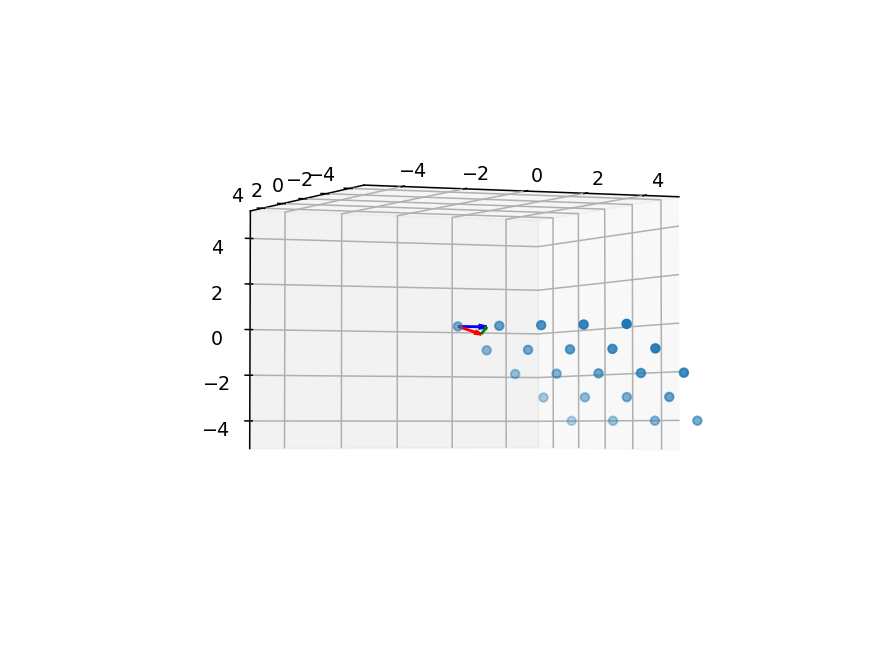

vs = [[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]]
Avs = [[ 0  1  2  3  4  1  2  3  4  5  2  3  4  5  6  3  4  5  6  7  4  5  6  7
   8]
 [ 0 -1 -2 -3 -4  0 -1 -2 -3 -4  0 -1 -2 -3 -4  0 -1 -2 -3 -4  0 -1 -2 -3
  -4]
 [ 0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4 -4
  -4]]
proj = [ 0.66666667 -0.33333333 -0.33333333]
b-proj = [0.33333333 0.33333333 0.33333333]


In [16]:
A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])

### draw the grid using the columns of 𝐴
grid = np.meshgrid(np.arange(5),np.arange(5))
xs,ys = grid[0].ravel(),grid[1].ravel()

vs = np.vstack([xs,ys])
Avs = A.dot(vs)

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(*Avs)

### draw the vector b in blue
ax.quiver(0,0,0,b[0],b[1],b[2],color="blue")

### calculate & draw the projection
ATA = A.T.dot(A)
ATAinv = np.linalg.inv(ATA)
proj = A.dot(ATAinv).dot(A.T).dot(b)
ax.quiver(0,0,0,*proj,color='red')

### the red vector lies on the grid
### draw from red head to blue head
ax.quiver(*proj,*(b-proj),color='green')

### the green vector is orthogonal to the grid

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

print('vs =',vs)
print('Avs =',Avs)
print('proj =',proj)
print('b-proj =',b-proj)

###### 1(c)
It looks like the equation $A{\bf x} = {\bf b}$ is inconsistent (and has no solution).  
Find ${\bf x}$ such that $\|A{\bf x} - {\bf b}\|$ is minimized.

In [4]:
A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])
x = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)

### x is the projection of the vector b onto the column space of 𝐴  
print('x =',x)

x = [0.33333333 0.33333333]


## Exercises

###### Exercise 2
Let  
```python
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T
```

###### 2(a)
Find ${\bf c}$ such that $\|A{\bf c} - {\bf y}\|$ is minimized.

In [5]:
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T

### Similarly, c is the projection of a vector y onto the column space of 𝐴  
c=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

print('A =',A)
print('c =',c)

A = [[1 1]
 [1 2]
 [1 3]]
c = [0.03333333 1.        ]


###### 2(b)
Let $f(x) = 1.5 + 0.5 x$.  
Find a vector ${\bf v}\in\mathbb{R}^2$ such that 
$$A{\bf c} = \begin{bmatrix} f(1) \\ f(2) \\ f(3) \end{bmatrix}.$$

In [17]:
### revision Ac to Av
A = np.vstack([np.ones_like(x), x]).T
print('A =',A)
v = np.array([[1.5],[0.5]])

print('v =',v)
print('Av =',A.dot(v))


A = [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]
v = [[1.5]
 [0.5]]
Av = [[2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]]


###### 2(c)
Let $f(x) = c_0 + c_1x$.  
Find the coefficients $c_0$ and $c_1$ such that  
$$\sum_{i=0}^2 (f(x_i) - y_i)^2$$
is minimized.

In [7]:
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T

### c is minimum function 
c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
c0 = c[0]
c1 = c[1]
print('c =',c)
print('c0 =',c0)
print('c1 =',c1)

c = [0.03333333 1.        ]
c0 = 0.0333333333333341
c1 = 1.0


###### 2(d)
Plot the points $(x_i,y_i)$ in blue.  
Plot the points $(x_i,f(x_i))$ in red, where $f(x)$ is the one you found in 2(c).  

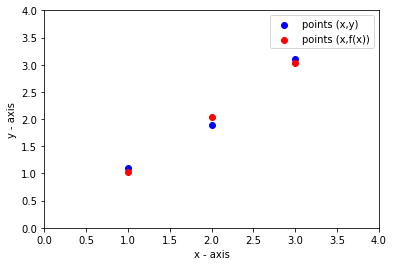

In [8]:
%matplotlib inline
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T

c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

# corresponding f function
f = A.dot(c)

## plot the point (xi, yi) in blue.
plt.scatter(x, y, label= "points (x,y)", color= "blue")

## plot the point (xi, f(xi)) in red.
plt.scatter(x, f, label= "points (x,f(x))", color= "red")

# setting x and y axis range
plt.ylim(0,4)
plt.xlim(0,4)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# show a legend on the plot
plt.legend()


###### Exercise 3
Let  
```python
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T
```

###### 3(a)
Find ${\bf c}$ such that $\|A{\bf c} - {\bf y}\|$ is minimized.

In [18]:
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T


c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

print(c)

[0.72       1.82857143 0.12857143]


###### 3(b)
Let $f(x) = 0.5 + 2 x + 0.1x^2$.  
Find a vector ${\bf v}\in\mathbb{R}^3$ such that 
$$A{\bf c} = \begin{bmatrix} f(1) \\ f(2) \\ f(3) \\ f(4) \\ f(5) \end{bmatrix}.$$

In [19]:
### revision Ac to Av
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T

v = np.array([0.5, 2, 0.1])

print('v =',v)

print('Av =',A.dot(v))


v = [0.5 2.  0.1]
Av = [ 2.6  4.9  7.4 10.1 13. ]


###### 3(c)
Let $f(x) = c_0 + c_1x + c_2x^2$.  
Find the coefficients $c_0,c_1,c_2$ such that  
$$\sum_{i=0}^2 (f(x_i) - y_i)^2$$
is minimized.

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T

c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

c0,c1,c2 = c[0],c[1],c[2]
print('c0 =',c[0])
print('c1 =',c[1])
print('c2 =',c[2])


c0 = 0.7200000000000841
c1 = 1.828571428571406
c2 = 0.12857142857143034


###### 3(d)
Plot the points $(x_i,y_i)$ in blue.  
Plot the points $(x_i,f(x_i))$ in red, where $f(x)$ is the one you found in 3(c).  

<IPython.core.display.Javascript object>


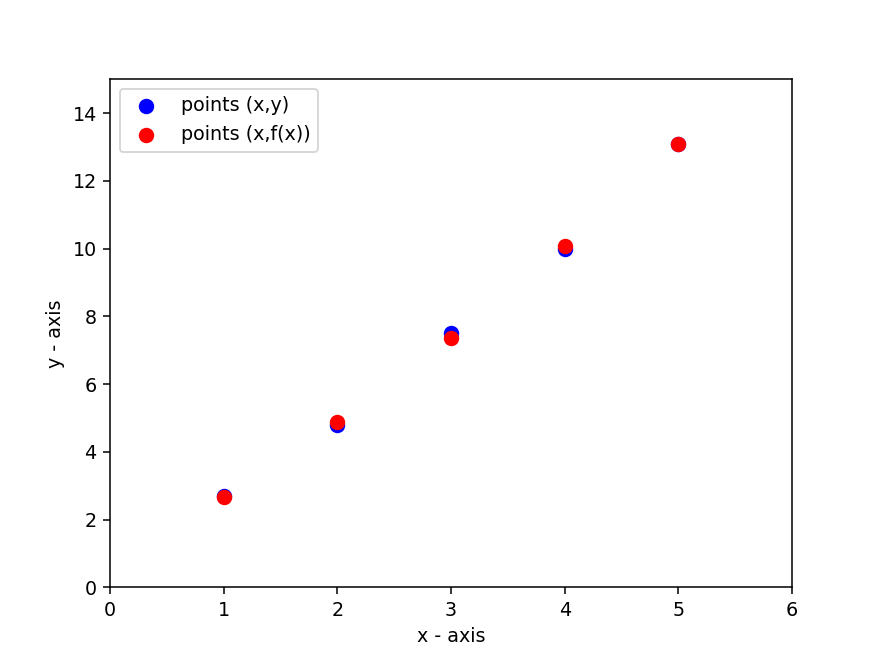

<IPython.core.display.Javascript object>


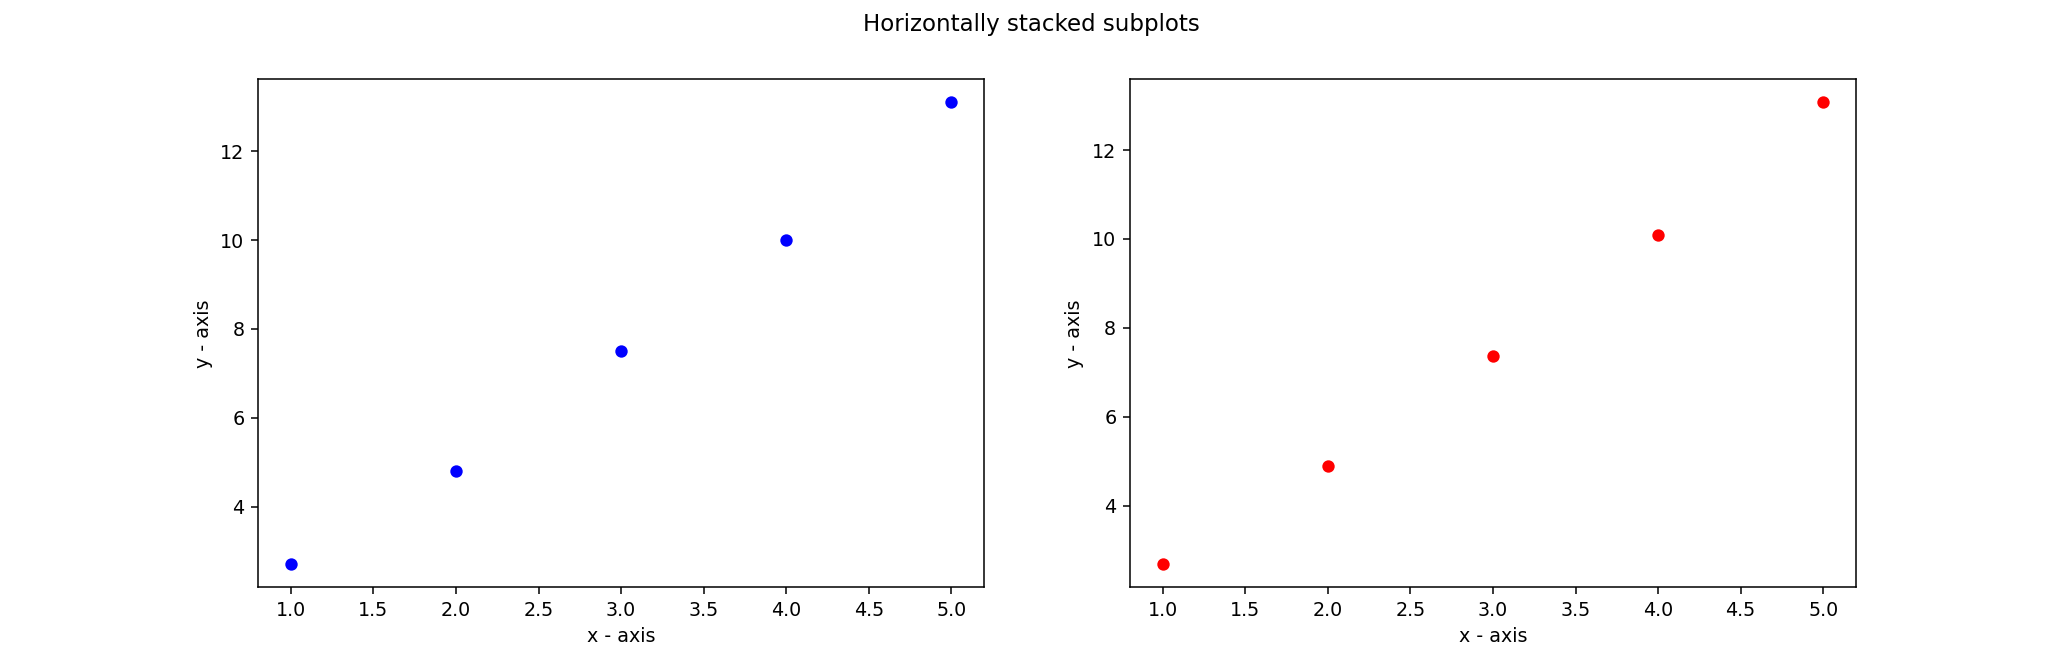

Text(0.5, 0, 'x - axis')

In [12]:
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T

c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
f = A.dot(c)

%matplotlib notebook

## plot the points (xi, yi) in blue.
plt.scatter(x, y, label= "points (x,y)", color= "blue", s=50)

## plot the points (xi, f(xi)) in red.
plt.scatter(x, f, label= "points (x,f(x))", color= "red", s=50)

# setting x and y axis range
plt.ylim(0,15)
plt.xlim(0,6)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# show a legend on the plot
plt.legend()

# two figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(x, y, label= "points (x,y)", color= "blue", s=30)
ax1.set_ylabel('y - axis')
ax1.set_xlabel('x - axis')
ax2.scatter(x, A.dot(c), label= "points (x,f(x))", color= "red", s=30)
ax2.set_ylabel('y - axis')
ax2.set_xlabel('x - axis')


##### Exercise 4
Let  
```python
u = np.array([1,1])
```

###### 4(a)
Find the projection matrix $P$ such that $P{\bf x}$ is the projection of ${\bf x}$ onto the line spanned by ${\bf u}$.  
Can you find a formula of $P$ by ${\bf u}$?

In [13]:
## u.shape  #mx1
u = np.array([1,1]).reshape(2,1)

uT = u.T
u1 = u.dot(uT)
u2 = uT.dot(u)

## a formula of P by u
P = u1*(1/u2)

print('P =',P)

P = [[0.5 0.5]
 [0.5 0.5]]


###### 4(b)
Let  
```python
u_hat = u / np.linalg.norm(u)
```
be a vector of length 1.  
Check if the $P$ for $\hat{\bf u}$ is the same as the $P$ for ${\bf u}$.  
Can you find a formula of $P$ by $\hat{\bf u}$?

In [14]:
## u.shape  #mx1
u = np.array([1,1]).reshape(2,1)

u1 = u.dot(u.T)
u2 = u.T.dot(u)
P = u1*(1/u2)


u_hat = u / np.linalg.norm(u)
u_hat1 = u_hat.dot(u_hat.T)
u_hat2 = u_hat.T.dot(u_hat)
P_hat = u_hat1*(1/u_hat2)


print(P)
print(P_hat)

P==P_hat


[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]


array([[ True,  True],
       [ True,  True]])

#### Remark
Think about the reasons behind the main idea.  
1. One may write ${\bf b} = {\bf p} + {\bf h}$ such that ${\bf p}\in\operatorname{Col}(A)$ and ${\bf h}\perp\operatorname{Col}(A)$.  This means the following:  
    - ${\bf p} = A{\bf x}$ for some ${\bf x}$
    - $A^\top {\bf h} = {\bf 0}$
2. Then $A^\top {\bf b} = A^\top{\bf p} = A^\top A{\bf x}$ for some ${\bf x}$.
3. $(A^\top A)^{-1}A^\top{\bf b} = {\bf x}$
4. $A(A^\top A)^{-1}A^\top{\bf b} = A{\bf x} = {\bf p}$ is the projection.

In [15]:
FC = 'Thank you'
FC

'Thank you'